<a href="https://colab.research.google.com/github/SimonBurmer/Jupyter-Notebook/blob/master/Keras_Iris_data_set_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#all the data is saved in an nparry
iris = load_iris()
features = iris['data']
target = iris['target']
target_names =  iris['target_names']
feature_names = iris['feature_names']

#**Show Dataset**


---



In [14]:

iris_target_list =target.tolist() 
#to store differten data types we have to convert the array into a list

for i in range(len(iris_target_list)):
    if iris_target_list[i] == 0:
        iris_target_list[i] = "Iris setosa"
    if iris_target_list[i] == 1:
        iris_target_list[i] = "Iris virginica"
    if iris_target_list[i] == 2:
        iris_target_list[i] = "Iris versicolor"

frame = pd.DataFrame(features, columns= feature_names)
frame.insert(4, "Iris", iris_target_list)
frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris
0,5.1,3.5,1.4,0.2,Iris setosa
1,4.9,3.0,1.4,0.2,Iris setosa
2,4.7,3.2,1.3,0.2,Iris setosa
3,4.6,3.1,1.5,0.2,Iris setosa
4,5.0,3.6,1.4,0.2,Iris setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris versicolor
146,6.3,2.5,5.0,1.9,Iris versicolor
147,6.5,3.0,5.2,2.0,Iris versicolor
148,6.2,3.4,5.4,2.3,Iris versicolor


# **Data Preperation**

---


1.   I use the OneHotEncoder to encode the target into a One-hot vector.
2.   Then i use a StandardScaler to remove the mean and scale the features to unit variance.
1.   Finally i perform a train test split.











In [15]:
# One hot encod the target
target2D = target[:, np.newaxis]

enc = OneHotEncoder()
y = enc.fit_transform(target2D) #fit_transform needs a 2D array 
y = y.toarray()

print(target2D[:3,])
print("becoms:")
print(y[:3,])

[[0]
 [0]
 [0]]
becoms:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [16]:
# Scale fetures to have mean 0 and variance 1 
scaler = StandardScaler()
X = scaler.fit_transform(features)

print(features[:3,])
print("becoms:")
print(X[:3,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
becoms:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]


In [0]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# **Visualize the Data**

---



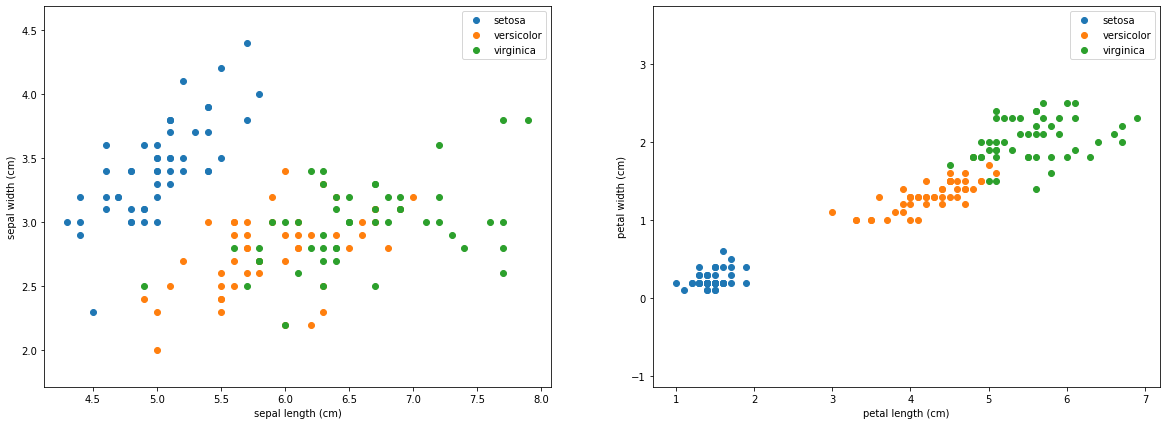

In [18]:
plt.figure(figsize= (20,7))
plt.subplot(1,2,1)
for i, target_name in enumerate(target_names):
    X_plot = features[target == i]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.axis('equal')


plt.subplot(1,2,2)
for i, target_name in enumerate(target_names):
    X_plot = features[target == i]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.legend()
plt.axis('equal')

plt.show()


# **Build Keras models**

---



In [19]:
from tensorflow.keras import  layers, models



def create_model(input_dim, output_dim, nodes, n=1,name='model'):
    # Create model
    model = models.Sequential(name=name)
    for i in range(n):
        model.add(layers.Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(layers.Dense(output_dim, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

myModels = []
for i in range(1,4):
    myModels.append(create_model(4, 3, 8, i,"Model_" + str(i)))

myModels[1].summary()

Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 27        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 27        
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


# **Train the Models**

---



In [22]:
history_list = []

for model in myModels:
    print('Model name:', model.name)
    history = model.fit(X_train, Y_train, batch_size=5, epochs=100, verbose=0, validation_data=(X_test, Y_test))
    history_list.append(history)
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(" ")

Model name: Model_1
Test loss: 0.1292921006679535
Test accuracy: 0.9333333373069763
 
Model name: Model_2
Test loss: 0.06781816482543945
Test accuracy: 0.9733333587646484
 
Model name: Model_3
Test loss: 0.09010672569274902
Test accuracy: 0.9733333587646484
 


# **Plot Results**

---



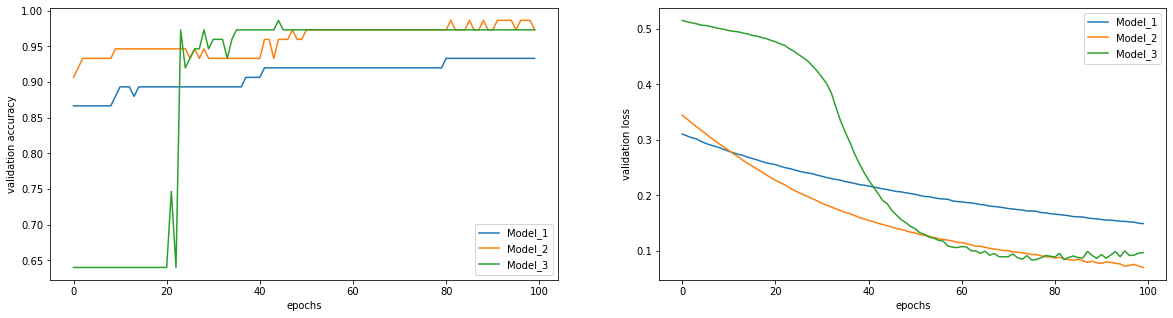

In [23]:
#Plot Accuracy and Loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

for i, history in enumerate(history_list):
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    ax1.plot(val_acc, label=myModels[i].name)
    ax2.plot(val_loss, label=myModels[i].name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax1.set_xlabel('epochs')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()